In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

**Importing the Dataset**

In [2]:
dataset_dir = "Crop Disease"  
full_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    label_mode='categorical',      
    image_size=(224, 224),          
    batch_size=32,
    shuffle=True
)

Found 12789 files belonging to 3 classes.


In [3]:
# Get class names
class_names = full_ds.class_names
print("Detected Main Classes:", class_names)

Detected Main Classes: ['Corn', 'Potato', 'Wheat']


**Visualizing some of the images in the dataset**

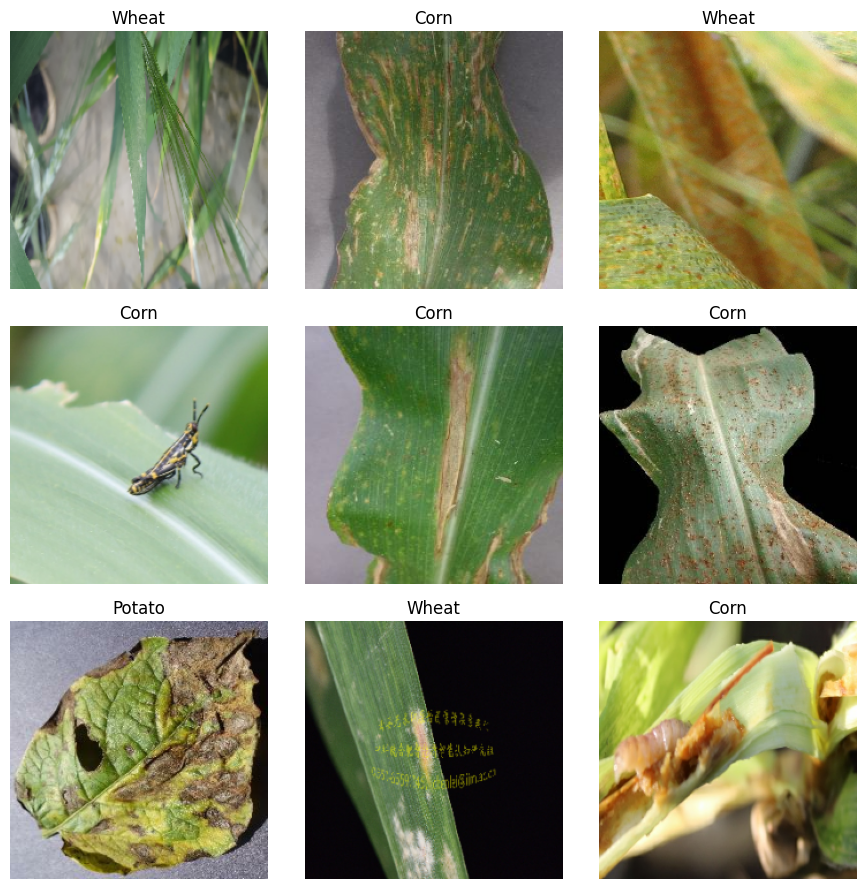

In [4]:
plt.figure(figsize=(9, 9))
for images, labels in full_ds.take(1):  # one batch
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        label_index = tf.argmax(labels[i]).numpy()
        plt.title(class_names[label_index])
        plt.axis("off")
plt.tight_layout()
plt.savefig("image_sample.png")
plt.show()


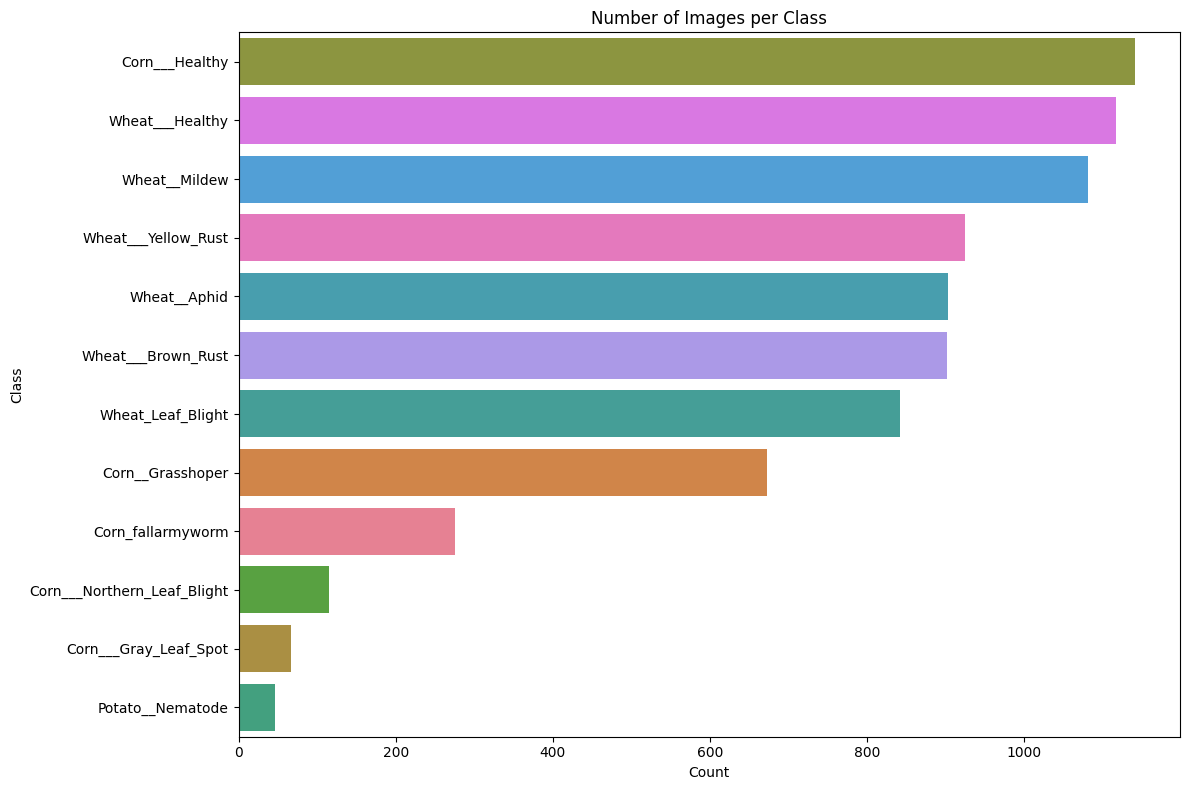

In [5]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


dataset_dir = "Crop Disease"


image_paths = []
labels = []

for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):  
            path = os.path.join(root, file)
            image_paths.append(path)
            
            
            parts = path.split(os.sep)
            if len(parts) >= 4:
                crop = parts[-4]
                condition = parts[-3]
                specific = parts[-2]
                label = f"{specific}"
                labels.append(label)
            else:
                labels.append("unknown")


df = pd.DataFrame({'image_path': image_paths, 'label': labels})


plt.figure(figsize=(12, 8))
sns.countplot(data=df, y="label",hue="label", order=df['label'].value_counts().index)
plt.title("Number of Images per Class")
plt.xlabel("Count")
plt.ylabel("Class")
plt.tight_layout()
plt.savefig("countplot.png")
plt.show()


**Building the Model - CNN**

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os

crop_data_dir = 'Crop Disease Pest'  # Contains Corn, Potato, Wheat folders

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_crop = train_datagen.flow_from_directory(
    crop_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_crop = train_datagen.flow_from_directory(
    crop_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

def build_model(n_classes):
    model = Sequential([
        Conv2D(96, (3,3), activation='relu', input_shape=(224,224,3)),
        MaxPooling2D(2,2),
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dense(n_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


Found 9558 images belonging to 3 classes.
Found 2389 images belonging to 3 classes.


In [7]:
model_crop = build_model(3)
model_crop.fit(train_crop, validation_data=val_crop, epochs=20)
model_crop.save("model_crop.h5")

D:\DS\skiesproject\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\DS\skiesproject\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
299/299 ━━━━━━━━━━━━━━━━━━━━ 5731s 19s/step - accuracy: 0.7550 - loss: 1.5317 - val_accuracy: 0.6676 - val_loss: 0.6770
Epoch 2/20
299/299 ━━━━━━━━━━━━━━━━━━━━ 1465s 5s/step - accuracy: 0.9254 - loss: 0.1992 - val_accuracy: 0.7861 - val_loss: 0.5361
Epoch 3/20
299/299 ━━━━━━━━━━━━━━━━━━━━ 1353s 5s/step - accuracy: 0.9594 - loss: 0.1204 - val_accuracy: 0.7953 - val_loss: 0.5852
Epoch 4/20
299/299 ━━━━━━━━━━━━━━━━━━━━ 1347s 5s/step - accuracy: 0.9692 - loss: 0.0988 - val_accuracy: 0.8188 - val_loss: 0.6337
Epoch 5/20
299/299 ━━━━━━━━━━━━━━━━━━━━ 1333s 4s/step - accuracy: 0.9851 - loss: 0.0459 - val_accuracy: 0.7585 - val_loss: 0.7578
Epoch 6/20
299/299 ━━━━━━━━━━━━━━━━━━━━ 1349s 5s/step - accuracy: 0.9833 - loss: 0.0581 - val_accuracy: 0.7807 - val_loss: 0.8122
Epoch 7/20
299/299 ━━━━━━━━━━━━━━━━━━━━ 1356s 5s/step - accuracy: 0.9861 - loss: 0.0486 - val_accuracy: 0.7677 - val_loss: 0.8238
Epoch 8/20
299/299 ━━━━━━━━━━━━━━━━━━━━ 1330s 4s/step - accuracy: 0.9928 - loss: 0.0252 -

In [8]:
loss, acc = model_crop.evaluate(val_crop)
print(f"Validation Accuracy: {acc*100:.2f}%")

75/75 ━━━━━━━━━━━━━━━━━━━━ 64s 831ms/step - accuracy: 0.8195 - loss: 1.2719
Validation Accuracy: 77.15%


In [9]:
import numpy as np
from sklearn.metrics import classification_report

# Step 1: Reset the generator and get predictions
val_crop.reset()
y_pred_probs = model_crop.predict(val_crop, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Step 2: Get true labels (must match number of predictions)
y_true = val_crop.classes  # Ensure both arrays are same length

# Step 3: Get class labels
class_labels = list(val_crop.class_indices.keys())

# Step 4: Generate classification report
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)


75/75 ━━━━━━━━━━━━━━━━━━━━ 58s 701ms/step
              precision    recall  f1-score   support

        Corn       0.67      0.87      0.76       960
      Potato       0.88      0.99      0.93       444
       Wheat       0.87      0.58      0.70       985

    accuracy                           0.77      2389
   macro avg       0.81      0.81      0.80      2389
weighted avg       0.79      0.77      0.76      2389



In [10]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Example crop prediction function
def predict_crop(img_path):
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    prediction = model_crop.predict(img_array)
    predicted_class = np.argmax(prediction)

    crop_labels = ['Corn', 'Potato', 'Wheat']
    return crop_labels[predicted_class]

# Test prediction
new_img_path = "maizeleaf.jpg"
predicted_crop = predict_crop(new_img_path)
print(f"Predicted Crop: {predicted_crop}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Crop: Wheat


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    'Crop Disease Pest/Corn',
    target_size=(224, 224),
    batch_size=32,
    subset='training',
    class_mode='categorical'
)

val_data = datagen.flow_from_directory(
    'Crop Disease Pest/Corn',
    target_size=(224, 224),
    batch_size=32,
    subset='validation',
    class_mode='categorical', shuffle=False
)

Found 3842 images belonging to 3 classes.
Found 959 images belonging to 3 classes.


In [3]:
print(train_data.class_indices)

{'Disease': 0, 'Healthy': 1, 'Pest': 2}


In [ ]:
model_status_corn = build_model(3)  # Healthy, Diseased, Pest
model_status_corn.fit(train_data, validation_data=val_data, epochs=10)
model_status_corn.save("model_status_corn.h5")

D:\DS\skiesproject\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\DS\skiesproject\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Step 1: Reset the generator and get predictions
val_crop.reset()
y_pred_probs = model_status_corn.predict(val_data, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Step 2: Get true labels (must match number of predictions)
y_true = val_data.classes  # Ensure both arrays are same length

# Step 3: Get class labels
class_labels = list(val_data.class_indices.keys())

# Step 4: Generate classification report
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')  # or 'weighted'
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Print results
print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Define the correct labels based on your class indices
status_labels = ['Disease', 'Healthy', 'Pest']  # Adjust order if needed

# Prediction function for health status
def predict_health_status(img_path, model_status):
    # Load and preprocess the image
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict using the correct trained model
    prediction = model_status.predict(img_array)
    predicted_index = np.argmax(prediction)

    return status_labels[predicted_index]



In [ ]:
# Assuming model_status is your trained CNN model for [Disease, Healthy, Pest]
new_img_path = "maizeleafrust.jpg"
status = predict_health_status(new_img_path, model_status_corn)

print(f"Predicted Status: {status}")


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    'Crop Disease Pest/Potato',
    target_size=(224, 224),
    batch_size=32,
    subset='training',
    class_mode='categorical'
)

val_data = datagen.flow_from_directory(
    'Crop Disease Pest/Potato',
    target_size=(224, 224),
    batch_size=32,
    subset='validation',
    class_mode='categorical'
)

model_status_potato = build_model(3)  # Healthy, Diseased, Pest
model_status_potato.fit(train_data, validation_data=val_data, epochs=10)
model_status_potato.save("model_status_potato.h5")

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Step 1: Reset the generator and get predictions
val_data.reset()
y_pred_probs = model_status_potato.predict(val_data, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Step 2: Get true labels (must match number of predictions)
y_true = val_data.classes  # Ensure both arrays are same length

# Step 3: Get class labels
class_labels = list(val_data.class_indices.keys())

# Step 4: Generate classification report
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Define the correct labels based on your class indices
status_labels = ['Disease', 'Healthy', 'Pest']  # Adjust order if needed

# Prediction function for health status
def predict_health_status(img_path, model_status):
    # Load and preprocess the image
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict using the correct trained model
    prediction = model_status.predict(img_array)
    predicted_index = np.argmax(prediction)

    return status_labels[predicted_index]

# Assuming model_status is your trained CNN model for [Disease, Healthy, Pest]
new_img_path = "potatoleaf.jpg"
status = predict_health_status(new_img_path, model_status_corn)

print(f"Predicted Status: {status}")

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    'Crop Disease Pest/Wheat',
    target_size=(224, 224),
    batch_size=32,
    subset='training',
    class_mode='categorical'
)

val_data = datagen.flow_from_directory(
    'Crop Disease Pest/Wheat',
    target_size=(224, 224),
    batch_size=32,
    subset='validation',
    class_mode='categorical'
)

model_status_wheat = build_model(3)  # Healthy, Diseased, Pest
model_status_wheat.fit(train_data, validation_data=val_data, epochs=10)
model_status_wheat.save("model_status_wheat.h5")

In [ ]:
# Show class names from folder names
print("Class labels found:", train_data.class_indices)

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Step 1: Reset the generator and get predictions
val_data.reset()
y_pred_probs = model_status_wheat.predict(val_data, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Step 2: Get true labels (must match number of predictions)
y_true = val_data.classes  # Ensure both arrays are same length

# Step 3: Get class labels
class_labels = list(val_data.class_indices.keys())

# Step 4: Generate classification report
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)

In [ ]:
disease_data_dir = 'Crop Disease/Corn'

train_disease = train_datagen.flow_from_directory(
    disease_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_disease = train_datagen.flow_from_directory(
    disease_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

model_disease_corn = build_model(6)  # 6 diseases/pests
model_disease_corn.fit(train_disease, validation_data=val_disease, epochs=10)
model_disease_corn.save("model_disease_corn.h5")

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Step 1: Reset the generator and get predictions
val_disease.reset()
y_pred_probs = model_disease_corn.predict(val_disease, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Step 2: Get true labels (must match number of predictions)
y_true = val_disease.classes  # Ensure both arrays are same length

# Step 3: Get class labels
class_labels = list(val_disease.class_indices.keys())

# Step 4: Generate classification report
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)

In [ ]:
disease_data_dir = 'Crop Disease/Potato'

train_disease = train_datagen.flow_from_directory(
    disease_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_disease = train_datagen.flow_from_directory(
    disease_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

model_disease_potato = build_model(4)  # 4 pests
model_disease_potato.fit(train_disease, validation_data=val_disease, epochs=10)
model_disease_potato.save("model_disease_corn.h5")

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Step 1: Reset the generator and get predictions
val_disease.reset()
y_pred_probs = model_disease_potato.predict(val_disease, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Step 2: Get true labels (must match number of predictions)
y_true = val_disease.classes  # Ensure both arrays are same length

# Step 3: Get class labels
class_labels = list(val_disease.class_indices.keys())

# Step 4: Generate classification report
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)

In [ ]:
disease_data_dir = 'Crop Disease/Wheat'

train_disease = train_datagen.flow_from_directory(
    disease_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_disease = train_datagen.flow_from_directory(
    disease_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

model_disease_wheat = build_model(6)  # 4 diseases/pests
model_disease_wheat.fit(train_disease, validation_data=val_disease, epochs=10)
model_disease_wheat.save("model_disease_wheat.h5")

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Step 1: Reset the generator and get predictions
val_disease.reset()
y_pred_probs = model_disease_wheat.predict(val_disease, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Step 2: Get true labels (must match number of predictions)
y_true = val_disease.classes  # Ensure both arrays are same length

# Step 3: Get class labels
class_labels = list(val_disease.class_indices.keys())

# Step 4: Generate classification report
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os

crop_data_dir = 'Crop Disease Pest'  # Contains Corn, Potato, Wheat folders

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_crop = train_datagen.flow_from_directory(
    crop_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_crop = train_datagen.flow_from_directory(
    crop_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

In [ ]:
print("Class names and labels:", train_crop.class_indices)

In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam

In [ ]:
# Build the base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

In [ ]:
output_classes = len(train_crop.class_indices)

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(output_classes, activation='softmax')
])

In [ ]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

model.fit(train_crop, validation_data=val_crop, epochs=10)

In [ ]:
remedies = {
    'Fallarmyworm': 'Use pheromone traps, neem oil or Bt-based pesticides.',
    'Grasshopper': 'Apply insecticides like malathion or biological controls.',
    'Common_Rust': 'Apply fungicide and use resistant hybrids.',
    'Gray_Leaf_Spot': 'Use crop rotation and foliar fungicides.',
    'Northern_Leaf_Blight': 'Use resistant varieties and proper field spacing.',
    'Early_Blight': 'Apply chlorothalonil fungicides and remove debris.',
    'Late_Blight': 'Use certified seeds and systemic fungicides.',
    'Nematode': 'Use nematicides and crop rotation.',
    'Brown_Rust': 'Use resistant varieties and early fungicide spraying.',
    'Yellow_Rust': 'Apply triazole fungicides and improve air circulation.',
    'Leaf_Blight': 'Ensure proper field hygiene and use fungicides.',
    'Aphid': 'Use insecticidal soap or neem oil.',
    'Mildew': 'Improve air flow and apply sulfur-based fungicides.',
    'Healthy': 'No action needed.'
}


In [ ]:
 from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

def build_model(num_classes):
    base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base.trainable = False  # For transfer learning

    model = models.Sequential([
        base,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model